In [1]:
from tqdm import tqdm
import scipy.stats as sts
import scipy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.special as sp

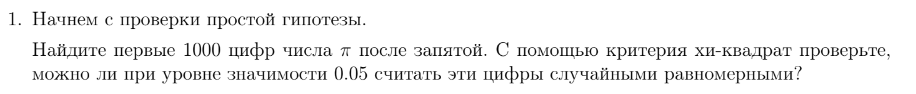

[ 93. 116. 103. 102.  93.  97.  94.  95. 101. 106.]
Результаты теста хи-квадрат:
Хи-квадрат статистика: 4.739999999999999
Количество степеней свободы: 9
Критическое значение для уровня значимости 0.05: 16.918977604620448
Можно ли считать цифры числа π после запятой случайными равномерными при уровне значимости 0.05: True


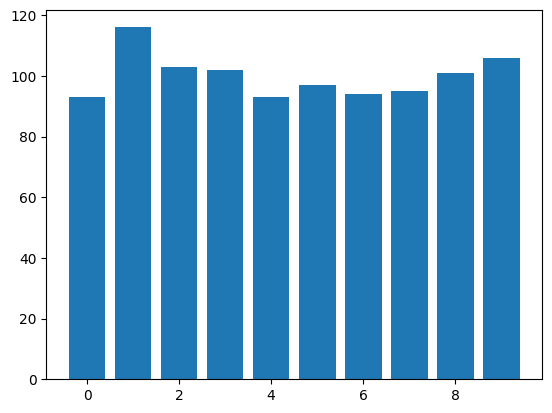

In [ ]:
from mpmath import mp
mp.dps = 1001
num1 = mp.pi
num2 = num1 - np.floor(num1)
num2 *= 10
digits = [0,1,2,3,4,5,6,7,8,9]
hypothesis = [100 for i in range(10)]
counters = np.zeros(10)
for i in range (1000):
    counters[int(np.floor(num2))] +=1
    num1 = num2
    num2 = num1 - np.floor(num1)
    num2 *= 10
print(counters)
plt.bar(digits, counters)
ddof = 9
chisq, pvalue = sts.chisquare(f_obs=counters, f_exp=hypothesis, ddof = ddof)

critical_value = sts.chi2.ppf(0.95, df=degrees_of_freedom)

is_uniform = chisq < critical_value

print("Результаты теста хи-квадрат:")
print("Хи-квадрат статистика:", chisq)
print("Количество степеней свободы:", ddof)
print("Критическое значение для уровня значимости 0.05:", critical_value)
print("Можно ли считать цифры числа π после запятой случайными равномерными при уровне значимости 0.05:", is_uniform)


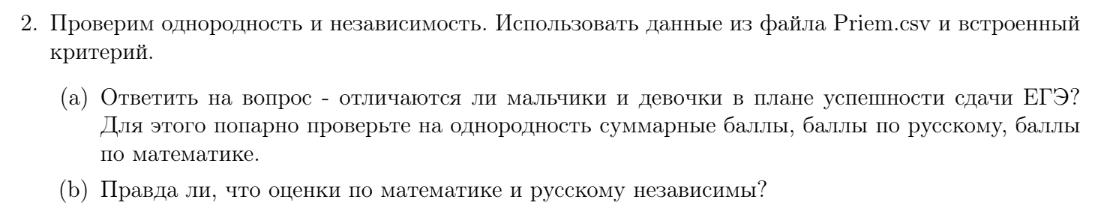

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Priem.csv', encoding='cp1251',sep=";")

cut_bins = [0, 70, 80, 90, 100]
cut_bins_sum = [0, 140, 160, 180, 200]
df['Sum'] = df['ЕГЭ...рус.яз.'] + df['ЕГЭ...матем.']

df1 = df[df['Пол'] == 'ЖЕНСКИЙ']
df2 = df[df['Пол'] == 'МУЖСКОЙ']


count_female_rus = df1.groupby(pd.cut(df1['ЕГЭ...рус.яз.'],bins=cut_bins))['ЕГЭ...рус.яз.'].count().to_numpy()
count_female_math = df1.groupby(pd.cut(df1['ЕГЭ...матем.'],bins=cut_bins))['ЕГЭ...матем.'].count().to_numpy()
count_female_avg = df1.groupby(pd.cut(df1['Sum'], bins=cut_bins_sum))['Sum'].count().to_numpy()

count_male_rus = df2.groupby(pd.cut(df2['ЕГЭ...рус.яз.'],bins=cut_bins))['ЕГЭ...рус.яз.'].count().to_numpy()
count_male_math = df2.groupby(pd.cut(df2['ЕГЭ...матем.'],bins=cut_bins))['ЕГЭ...матем.'].count().to_numpy()
count_male_avg = df2.groupby(pd.cut(df2['Sum'], bins=cut_bins_sum))['Sum'].count().to_numpy()


table = np.array([count_female_rus, count_male_rus])
pvalue = sts.chi2_contingency(table).pvalue
print(f"p-value: {pvalue}")

critical_value = 0.05
homogeneity = pvalue > critical_value

print("Результаты теста хи-квадрат для русского языка:")
print("Можно ли считать однородными результаты по русскому языку:", homogeneity)

for i in range(3):
  print("")

table = np.array([count_female_math, count_male_math])
pvalue = sts.chi2_contingency(table).pvalue
print(f"p-value: {pvalue}")
homogeneity2 = pvalue > critical_value
print("Результаты теста хи-квадрат для математики:")
print("Можно ли считать однородными результаты по математике:", homogeneity2)

for i in range(3):
  print("")

table = np.array([count_female_avg, count_male_avg])
pvalue = sts.chi2_contingency(table).pvalue
print(f"p-value: {pvalue}")
homogeneity3 = pvalue > critical_value

print("Результаты теста хи-квадрат для суммарных баллов:")
print("Можно ли считать однородными суммарные результаты:", homogeneity3)

for i in range(3):
  print("")

df_test_1 = df.groupby(pd.cut(df['ЕГЭ...рус.яз.'],bins=cut_bins))['ЕГЭ...рус.яз.'].count().to_numpy()
df_test_2 = df.groupby(pd.cut(df['ЕГЭ...матем.'],bins=cut_bins))['ЕГЭ...матем.'].count().to_numpy()

table = np.array([df_test_1, df_test_2])
pvalue = sts.chi2_contingency(table).pvalue

print(f"p-value: {pvalue}")
test = pvalue > critical_value
print("Результаты теста хи-квадрат для независимости:")
print("Можно ли считать результаты независимыми:", test)

p-value: 1.786770121758677e-15
Результаты теста хи-квадрат для русского языка:
Можно ли считать однородными результаты по русскому языку: False



p-value: 0.6108444846057453
Результаты теста хи-квадрат для математики:
Можно ли считать однородными результаты по математике: True



p-value: 2.0998881447778616e-05
Результаты теста хи-квадрат для суммарных баллов:
Можно ли считать однородными суммарные результаты: False



p-value: 9.561716545330092e-18
Результаты теста хи-квадрат для независимости:
Можно ли считать результаты независимыми: False


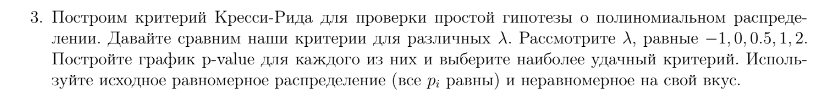

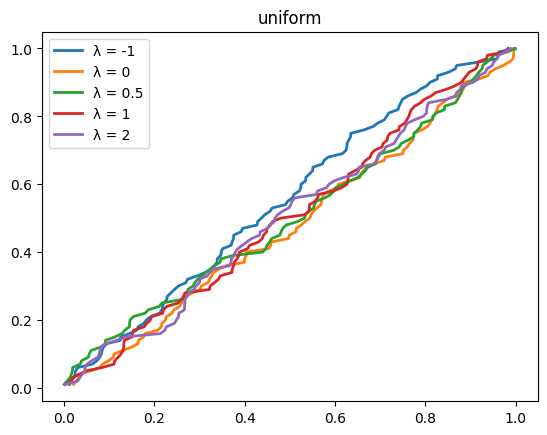

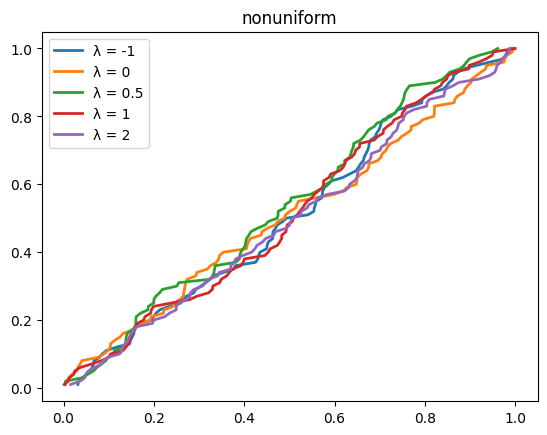

In [27]:
L = [-1, 0, 0.5, 1, 2]
n = 10000
uniform_dist = np.array([1/10 for i in range (10)])
exp1 = n*uniform_dist

fig, ax = plt.subplots()
plt.title("uniform")
for lambda_test in L:
    m = 100
    result = []
    for j in range (m):
        sample = sts.multinomial.rvs(n, uniform_dist)
        statistic, pvalue = sts.power_divergence(sample, f_exp=exp1, lambda_=lambda_test)
        result = np.append(result, pvalue)
    result = np.sort(result)
    y_vals = [(i+1)/m for i in range(m)]
    ax.plot(result, y_vals, lw = 2, label = f"λ = {lambda_test}")
plt.legend()

print("")

nonuniform_dist = np.array([0.1,0.1,0.15,0.05,0.1,0.1,0.05,0.1,0.1,0.15])
exp2 = n*nonuniform_dist

fig, ax = plt.subplots()
plt.title("nonuniform")
for lambda_test in L:
    m = 100
    result = []
    for j in range (m):
        sample = sts.multinomial.rvs(n, nonuniform_dist)
        statistic, pvalue = sts.power_divergence(sample, f_exp = exp2, lambda_=lambda_test)
        result = np.append(result, pvalue)
    result = np.sort(result)
    y_vals = [(i+1)/m for i in range(m)]
    ax.plot(result, y_vals, lw = 2, label = f"λ = {lambda_test}")
plt.legend()

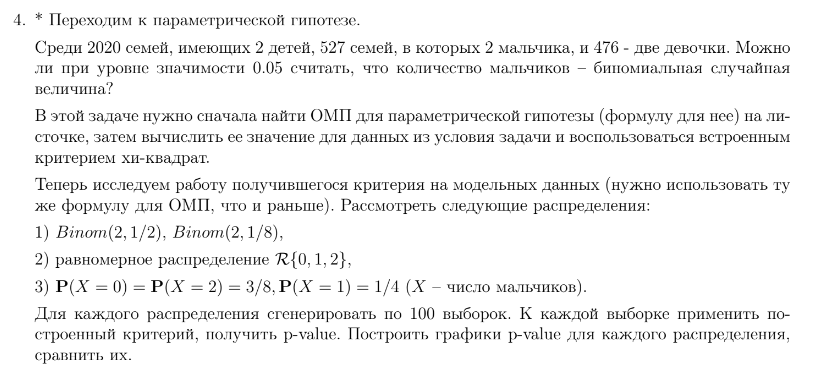

MLE is: 0.5126237623762376

P-value: 0.005632236291364146
Hypothesis acceptance: False



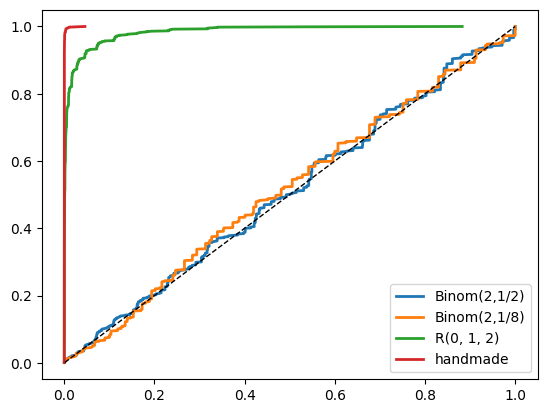

In [ ]:
def MLE(a:int, c:int, N:int):
    return (2*a + c)/(2*N)
a = 527
b = 476
c = 1017
N = 2020
alpha = 0.05
p_obs = MLE(a,c,N)
print(f"MLE is: {p_obs}\n")
m = 1000
y_vals = [(i+1)/m for i in range(m)]

practice = np.array([(1 - p_obs)**2, 2*p_obs*(1-p_obs), p_obs**2])
chisq, pvalue = sts.chisquare(f_obs=[527,1017,476], f_exp=N*practice)
print(f"P-value: {pvalue}")
print(f"Hypothesis acceptance: {pvalue > alpha}\n")

N = 100
############################## Binom(2,1/2) ############################
result = []
for j in range (m):
    Sample = sts.binom.rvs(n = 2, p = 1/2, size = N)
    f_obs = [np.count_nonzero(Sample == i) for i in [0,1,2]]
    p_obs = MLE(f_obs[2], f_obs[1], N)
    practice = np.array([(1 - p_obs)**2, 2*p_obs*(1-p_obs), p_obs**2])
    chisq, pvalue = sts.chisquare(f_obs=f_obs, f_exp=N*practice, ddof = 1)
    result = np.append(result, pvalue)

result = np.sort(result)
fig,ax = plt.subplots()
ax.plot(result, y_vals, lw = 2, label = "Binom(2,1/2)")
############################# Binom(2,1/8) ############################
result1 = []
for j in range (m):
    Sample = sts.binom.rvs(n = 2, p = 1/8, size = N)
    f_obs = [np.count_nonzero(Sample == i) for i in [0,1,2]]
    p_obs = MLE(f_obs[2], f_obs[1], N)
    practice = np.array([(1-p_obs)**2, 2*p_obs*(1-p_obs), p_obs**2])
    chisq, pvalue = sts.chisquare(f_obs=f_obs, f_exp=N*practice, ddof=1)
    result1 = np.append(result1, pvalue)
result1 = np.sort(result1)
ax.plot(result1, y_vals, lw = 2, label = "Binom(2,1/8)")
############################## R{0,1,2} ################################
result2 = []
for j in range (m):
    Sample = sts.randint.rvs(low = 0, high = 3, size = N)
    f_obs = [np.count_nonzero(Sample == i) for i in [0,1,2]]
    p_obs = MLE(f_obs[2], f_obs[1], N)
    practice = np.array([(1-p_obs)**2, 2*p_obs*(1-p_obs), p_obs**2])
    chisq, pvalue = sts.chisquare(f_obs=f_obs, f_exp=N*practice, ddof=1)
    result2 = np.append(result2, pvalue)
result2 = np.sort(result2)
ax.plot(result2, y_vals, lw = 2, label = "R(0, 1, 2)")
############################## HANDMADE ################################
result3 = []
for j in range (m):
    Sample = np.random.choice([0,1,2], p = [3/8,1/4,3/8], size = N)
    f_obs = [np.count_nonzero(Sample == i) for i in [0,1,2]]
    p_obs = MLE(f_obs[2], f_obs[1], N)
    practice = np.array([(1-p_obs)**2, 2*p_obs*(1-p_obs), p_obs**2])
    chisq, pvalue = sts.chisquare(f_obs=f_obs, f_exp=N*practice, ddof=1)
    result3 = np.append(result3, pvalue)
result3 = np.sort(result3)
ax.plot(result3, y_vals, lw = 2, label = "handmade")

ax.plot(y_vals, y_vals, lw = 1, color = 'black', linestyle='dashed')
plt.legend()